# 项目目的

研究LC贷款的风险特征，并提出建模方案。根据贷款状态将客户划分为违约客户和正常客户，典型的二分类问题。

# EDA

## 导入数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')  #风格设置
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Administrator\anaconda3\lib\site-packages\matplo

In [2]:
# Load data for analysis
df = pd.read_csv('./loan.csv', low_memory=False)

In [3]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking a...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & ...",other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,Borrower added on 12/21/11 > I plan on combining three large interest bills together and freei...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 数据总览

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [5]:
df.nunique()

id                             887379
member_id                      887379
loan_amnt                        1372
funded_amnt                      1372
funded_amnt_inv                  9856
term                                2
int_rate                          542
installment                     68711
grade                               7
sub_grade                          35
emp_title                      299271
emp_length                         11
home_ownership                      6
annual_inc                      49384
verification_status                 3
issue_d                           103
loan_status                        10
pymnt_plan                          2
url                            887379
desc                           124469
purpose                            14
title                           63144
zip_code                          935
addr_state                         51
dti                              4086
delinq_2yrs                        29
earliest_cr_

## 目标特征

In [6]:
df.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

|  **贷款状态**   | **语义**  |**Bad**|**Late**|**Good**|**Cur**|
|  :-----  | :-----  | :-----  | :-----  | :-----  | :-----  |
| Current  | 贷中 | - | - | - | Y |
| Fully Paid  | 全额还款 |- |- |Y |- |
| **Default**  | 违约 | Y | - | - | - |
| **Charged Off**  | 坏账 |Y |- |- |- |
| Issued  | 发布 |- |- |- |Y |
| In Grace Period  | 宽限期（逾期15天之内） | - | Y | - | - |
| Late (16-30 days)  | 逾期16-30天 |- |Y |- |- |
| Late (31-120 days)  | 逾期31-120天 | - | Y | - | - |
| Does not meet the credit policy. Status:Fully Paid  | 全额还款（不符合信用） |- |- |Y |- |
| Does not meet the credit policy. Status:Charged Off  | 坏账（不符合信用） |Y |- |- |- |

In [7]:
#封装一个替换函数
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)#创建一个和loan_status一样的 Series
    for key, value in codeDict.items():#返回可遍历的(键, 值) 元组数组
        colCoded.replace(key, value, inplace=True)#替换原有数据
    return colCoded

In [8]:
##把贷款状态LoanStatus编码为违约=1, 正常=0:
dict1={'Current':0,'Issued':0,'Fully Paid':0,'Does not meet the credit policy. Status:Fully Paid':0,'Charged Off':1,'Late (31-120 days)':1,'Late (16-30 days)':1,'In Grace Period':1,"Default":1,'Does not meet the credit policy. Status:Charged Off':1}
df["loan_status_class"]=coding(df["loan_status"],dict1)

In [9]:
df.loan_status_class.value_counts()

0    819950
1     67429
Name: loan_status_class, dtype: int64

存在正负样本不均衡的问题

## 特征分布

In [10]:
#col=["loan_amnt","term","int_rate","grade","emp_length","annual_inc","verification_status","loan_status","purpose","dti","delinq_2yrs","inq_last_6mths",'open_acc',"pub_rec","revol_bal","total_acc","total_rev_hi_lim","addr_state","home_ownership","emp_title","loan_status_class"]
#df1=df[col]   

In [11]:
#df1.columns=["申请额度","借款期限","利率","评级","工作年限","年收入","收入来源是否核实","借款状态","借款目的","负债率","近两年逾期30天以上的次数","近6个月征信查询次数","未结清借款数","负面记录","未结清借款总额","剩余信用额度","总授信额度","所在地","住房状态","职位","分类"]

In [12]:
#df1.info()

In [13]:
##描述分类属性依据好坏样本的分布情况
#cla=["借款期限","评级","工作年限","收入来源是否核实","借款目的","住房状态"]
#for i in cla:
#    pvt=pd.pivot_table(df1[["分类",i]],index=i,columns="分类",aggfunc=len) 
#    pvt.plot(kind="bar")

**由图可知：**  
1. 大部分人选择36期贷款，少部分选择60期，但是60期逾期百分比明显高于36期，借款时间越长，风险越大。  
2. 评级，这个评级与利息相关的，随着评级下降风险越来越高，利息越来越高，我们可以认为相应的逾期率较大，本图也反馈了LC 评级的优异性能  
3. 值得注意的是，工作年限10年以上的借款人相对较多，这与我们的一般认知不符合，除此以外工作1-9年的人群随着工作年限加长，借款需求相对减少，可能是收入相对稳定了  
4. 收入来源是否经过核实，大部分是经过核实的，并且经过核实的违约概率相对较低  
5. 借款目的：债务整合，还信用卡，家具装修，三类最多  
6. 住房状态：按揭与租房最多，租房违约率相对较高  

In [14]:
#cel1=[i for i in df1.columns if df1[i].dtypes =="float"]
#for i ,j in enumerate(cel1):
#    plt.figure(figsize=(8,5*len(cel1)))
#    plt.subplot(len(cel1),1,i+1)
#    sns.distplot(df1[j][df1.分类==0],color="b")
#    sns.distplot(df1[j][df1.分类==1],color="r")

借款额度呈正太分布，稍有一点左偏，表明业务多集中在中小额度上面，且额度越高逾期率相对有所增加。  
利率符合正态分布  
年收入差距很大  
近两年逾期30天以上的次数，说明即使一次逾期记录也没有，客户也是可能逾期的  
征信查询，查的越多越容易逾期  
没有负面记录也是会逾期的，但是有负面记录的人逾期率要高得多。  

申请地与职位的频率

In [15]:
#df1["职位"].value_counts()

In [16]:
#df1["所在地"].value_counts()

借款人 职务 大多是公司职员  
借款人主要集中在，加利福利亚，纽约 德克萨斯州（该公司中部在加州）

探索借款用途与利率之间的关系

In [17]:
#sns.boxplot(y="purpose",x="int_rate",data=df)

借款用途为 small_business 的借款利率最高

 探索利率、收入、工作年限和借款状态之间的关系

In [18]:
#dict2={"10+ years": 10,"9 years": 9,"8 years": 8,"7 years": 7,"6 years": 6,"5 years": 5,"4 years": 4,"3 years": 3,"2 years": 2,"1 year": 1,"< 1 year": 0}
#df["emp_length"]=coding(df["emp_length"],dict2)
#df["annual_inc"]=df["annual_inc"].astype("float") #把收入中odjest 转换成float
#sns.pairplot(df, vars=["int_rate","annual_inc", "emp_length"],hue="loan_status_class", diag_kind="kde" ,kind="reg", size = 3)

工作年限越长，收入越高违约情况相对较低，相应的享受更低的利息

## 相关性

In [19]:
#sns.heatmap(df1.corr())

# 特征工程

## 缺失值

In [20]:
#查看缺失值
for i in df.columns:
    miss=df[i].isnull().sum()
    print(i,"\t",miss)

id 	 0
member_id 	 0
loan_amnt 	 0
funded_amnt 	 0
funded_amnt_inv 	 0
term 	 0
int_rate 	 0
installment 	 0
grade 	 0
sub_grade 	 0
emp_title 	 51462
emp_length 	 44825
home_ownership 	 0
annual_inc 	 4
verification_status 	 0
issue_d 	 0
loan_status 	 0
pymnt_plan 	 0
url 	 0
desc 	 761351
purpose 	 0
title 	 152
zip_code 	 0
addr_state 	 0
dti 	 0
delinq_2yrs 	 29
earliest_cr_line 	 29
inq_last_6mths 	 29
mths_since_last_delinq 	 454312
mths_since_last_record 	 750326
open_acc 	 29
pub_rec 	 29
revol_bal 	 0
revol_util 	 502
total_acc 	 29
initial_list_status 	 0
out_prncp 	 0
out_prncp_inv 	 0
total_pymnt 	 0
total_pymnt_inv 	 0
total_rec_prncp 	 0
total_rec_int 	 0
total_rec_late_fee 	 0
recoveries 	 0
collection_recovery_fee 	 0
last_pymnt_d 	 17659
last_pymnt_amnt 	 0
next_pymnt_d 	 252971
last_credit_pull_d 	 53
collections_12_mths_ex_med 	 145
mths_since_last_major_derog 	 665676
policy_code 	 0
application_type 	 0
annual_inc_joint 	 886868
dti_joint 	 886870
verification_sta

In [21]:
#删除缺失别列0.8以上的列
half_count = len(df)*0.8 # 设定阀值
df = df.dropna(thresh = half_count, axis = 1 ) #若某一列数据缺失的数量超过阀值就会被删除
df.shape
#data = data.drop(['desc', 'url'，'id'], axis = 1) #删除了一些无用列

(887379, 53)

In [22]:
#查看缺失值情况并决定哪些需要删除
data_defect=[i for i in df.columns if (df[i].isnull().sum())/df.shape[0] != 0]
for i in data_defect:
    defect=df[i].isnull().sum()/df.shape[0]
    j=str(df[i].dtype)
    print(i,j, defect)

emp_title object 0.057993258799227836
emp_length object 0.050513929223026464
annual_inc float64 4.507656818563433e-06
title object 0.00017129095910541043
delinq_2yrs float64 3.2680511934584885e-05
earliest_cr_line object 3.2680511934584885e-05
inq_last_6mths float64 3.2680511934584885e-05
open_acc float64 3.2680511934584885e-05
pub_rec float64 3.2680511934584885e-05
revol_util float64 0.0005657109307297107
total_acc float64 3.2680511934584885e-05
last_pymnt_d object 0.019900177939752912
last_credit_pull_d object 5.9726452845965476e-05
collections_12_mths_ex_med float64 0.00016340255967292442
acc_now_delinq float64 3.2680511934584885e-05
tot_coll_amt float64 0.07919502264534094
tot_cur_bal float64 0.07919502264534094
total_rev_hi_lim float64 0.07919502264534094


emp_title    职位     众数填充  
emp_length   工作时间   众数填充  
annual_inc   年收入    **均值填充**  
title      借款所有权  众数填充  
delinq_2yrs 最近2年逾期30天以上次数   众数填充  
earliest_cr_line 最早申请借款额度时间  众数填充  
inq_last_6mths 最近6个月的征信查询次数  众数填充  
open_acc 未结清账款数  众数填充  
pub_rec 贬损公共记录数量  众数填充  
revol_util 信贷循环额度使用率  **均值填充**  
total_acc 剩余信用额度  众数填充  
last_pymnt_d 上个月付款日期  众数填充  
last_credit_pull_d 最近一个月LC为这笔贷款提取了信贷 众数填充  
collections_12_mths_ex_med 除医疗账单外12个月的欠款数量  众数填充  
acc_now_delinq 目前欠款的账户数量  众数填充  
tot_coll_amt 催回总额  **均值填充**  
tot_cur_bal 所有帐户的当前总余额  **均值填充**  
total_rev_hi_lim  总授信额度 **均值填充**  

In [23]:
#众数填充
fil=["emp_title","emp_length","title","delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","total_acc","last_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","acc_now_delinq"]
from scipy.stats import mode # 计算众数模块
for i in fil:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [24]:
#确认缺失值情况
data_defect=[i for i in df.columns if (df[i].isnull().sum())/df.shape[0] != 0]
for i in data_defect:
    defect=df[i].isnull().sum()/df.shape[0]
    j=str(df[i].dtype)
    print(i,j, defect)

annual_inc float64 4.507656818563433e-06
revol_util float64 0.0005657109307297107
tot_coll_amt float64 0.07919502264534094
tot_cur_bal float64 0.07919502264534094
total_rev_hi_lim float64 0.07919502264534094


In [25]:
#均值填充
fil=["annual_inc","revol_util","tot_coll_amt","tot_cur_bal","total_rev_hi_lim"]
for i in fil:
    df[i].fillna(df[i].median(), inplace=True)

In [26]:
#确认缺失值情况
data_defect=[i for i in df.columns if (df[i].isnull().sum())/df.shape[0] != 0]
for i in data_defect:
    defect=df[i].isnull().sum()/df.shape[0]
    j=str(df[i].dtype)
    print(i,j, defect)

## 特征筛选

In [27]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status_class
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,0


"id" 无意义  
"member_id"  无意义  
"loan_status"  已被替换  
"pymnt_plan"  严重不均衡    
"url"  无意义  
"zip_code"  无意义  
"policy_code"  同值  
"application_type"  严重不均衡  
"emp_title " 无意义  
"title"  无意义
"addr_state" 无意义  


In [28]:
df_drop=df[["id","member_id","loan_status","pymnt_plan","url","zip_code","policy_code","application_type",
            "emp_title","title","addr_state"]]
df=df.drop(df_drop,axis=1)

In [29]:
##同值信息处理
#from scipy.stats import mode
#equ_fea=[]
#for i in df.columns:
#        mode_value=mode(df[i])[0][0]
#        mode_rate=mode(df[i])[1][0]/df.shape[0]
#        if mode_rate >0.9:
#            equ_fea.append([i,mode_value,mode_rate])
#dt=pd.DataFrame(equ_fea,columns=["name","value","equi"])
#dt.sort_values(by="equi")

In [30]:
df_drop=df[["recoveries","collection_recovery_fee","total_rec_late_fee"]]
df=df.drop(df_drop,axis=1)

In [31]:
# 定义字典，记录每个特征的信息值iv
iv_dict=dict()
def cal_iv(df,feature,target='target'):
    ls=[]
    for val in df[feature].unique():
        al=df[df[feature]==val][feature].count()
        good=df[(df[feature]==val)&(df[target]==1)][feature].count()
        bad=df[(df[feature]==val)&(df[target]==0)][feature].count()
        ls.append([val,al,good,bad])
    data=pd.DataFrame(ls,columns=[feature,'all','good','bad'])
    good_rate=data['good']/data['good'].sum()# good边际概率
    bad_rate=data['bad']/data['bad'].sum()# bad边际概率
    data['woe']=np.log(good_rate/bad_rate)# woe为证据权重
    data = data.replace({'woe': {np.inf: 0, -np.inf: 0}})
    data['iv']=data['woe']*(good_rate-bad_rate)
    iv=data.iv.sum()
#     添加到字典
    if feature not in iv_dict.keys():
        iv_dict[feature]=iv
    print('iv for %s is %f: '%(feature,iv))
    return iv,data

In [32]:
df.nunique()

loan_amnt                       1372
funded_amnt                     1372
funded_amnt_inv                 9856
term                               2
int_rate                         542
installment                    68711
grade                              7
sub_grade                         35
emp_length                        11
home_ownership                     6
annual_inc                     49384
verification_status                3
issue_d                          103
purpose                           14
dti                             4086
delinq_2yrs                       29
earliest_cr_line                 697
inq_last_6mths                    28
open_acc                          77
pub_rec                           32
revol_bal                      73740
revol_util                      1356
total_acc                        135
initial_list_status                2
out_prncp                     248332
out_prncp_inv                 266244
total_pymnt                   506726
t

In [33]:
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status_class
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,credit_card,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,Jan-2015,171.62,Jan-2016,0.0,0.0,0.0,80559.0,23700.0,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,car,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,Apr-2013,119.66,Sep-2013,0.0,0.0,0.0,80559.0,23700.0,1
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,small_business,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,Jun-2014,649.91,Jan-2016,0.0,0.0,0.0,80559.0,23700.0,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,other,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,Jan-2015,357.48,Jan-2015,0.0,0.0,0.0,80559.0,23700.0,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-2011,other,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,Jan-2016,67.79,Jan-2016,0.0,0.0,0.0,80559.0,23700.0,0


## 类别标签

In [34]:
#object型
numerical_fea = list(df.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(df.columns)))
category_fea

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d']

In [35]:
df_list={
    "term":{" 36 months":1," 60 months":2},
    "grade":{"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7},
    "sub_grade":{"A1":1,"A2":2,"A3":3,"A4":4,"A5":5,"B1":6,"B2":7,"B3":8,"B4":9,"B5":10,
                 "C1":11,"C2":12,"C3":13,"C4":14,"C5":15,"D1":16,"D2":17,"D3":18,"D4":19,"D5":20,
                 "E1":21,"E2":22,"E3":23,"E4":24,"E5":25,"F1":26,"F2":27,"F3":28,"F4":29,"F5":30,
                 "G1":31,"G2":32,"G3":33,"G4":34,"G5":35},
    "emp_length":{'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10,'< 1 year':0},
    "home_ownership":{"MORTGAGE":1,"RENT":2,"OWN":3,"OTHER":4,"NONE":5,"ANY":6 },
    "verification_status":{"Source Verified":1,"Verified":2,"Not Verified":3},
    "loan_status":{'Current':0,'Fully Paid':0,'Charged Off':1,'Late (31-120 days)':1,'Late (16-30 days)':1,'In Grace Period':1,"Default":1},
    "purpose":{"debt_consolidation":1,"credit_card":2,"home_improvement":3,"other":4,"major_purchase":5,"medical":6,"car":7,
               "small_business":8,"moving":9,"vacation":10,"house":11,"renewable_energy":12,"wedding":13,"educational":14},
    "initial_list_status":{"w":1,"f":2}
}
df=df.replace(df_list)#映射

## 特征衍生

In [36]:
#把'annual_inc'年收入除以"installment" 月收入得到的比，值越大客户还款压力越小
df["installment_feat"]=df["annual_inc"] / (df["installment"])

#把时序变量变成月份值，用借款发放时间 - 首次使用信用卡时间，作为一个新变量，表示信用历史
a=(pd.to_datetime(df['issue_d'])-pd.to_datetime(df['earliest_cr_line']))/30
df["cre_hist"]=a.astype('timedelta64[D]').astype(int)
df.drop(["issue_d","earliest_cr_line","last_pymnt_d","last_credit_pull_d"],axis=1,inplace=True)

## 连续变量分箱

In [ ]:
df.nunique()

In [38]:
from sklearn.tree import  DecisionTreeClassifier
def optimal_binning_boundary(x: pd.Series, y: pd.Series, nan: float = -999.) -> list:
    '''
        利用决策树获得最优分箱的边界值列表
    '''
    boundary = []  # 待return的分箱边界值列表
    
    x = x.fillna(nan).values  # 填充缺失值
    y = y.values
    
    clf = DecisionTreeClassifier(criterion='entropy',    #“信息熵”最小化准则划分
                                 max_leaf_nodes=6,       # 最大叶子节点数
                                 min_samples_leaf=0.05)  # 叶子节点样本数量最小占比

    clf.fit(x.reshape(-1, 1), y)  # 训练决策树
    
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    threshold = clf.tree_.threshold
    
    for i in range(n_nodes):
        if children_left[i] != children_right[i]:  # 获得决策树节点上的划分边界值
            boundary.append(threshold[i])

    boundary.sort()

    min_x = x.min()
    max_x = x.max() + 0.1  # +0.1是为了考虑后续groupby操作时，能包含特征最大值的样本
    boundary = [min_x] + boundary + [max_x]

    return boundary

In [39]:
optimal_binning_boundary(x=df['loan_amnt'],
                         y=df['loan_status_class'])

[500.0, 14987.5, 15037.5, 19962.5, 20037.5, 23937.5, 35000.1]

In [40]:
def feature_woe_iv(x: pd.Series, y: pd.Series, nan: float = -999.) -> pd.DataFrame:
    '''
        计算变量各个分箱的WOE、IV值，返回一个DataFrame
    '''
    x = x.fillna(nan)
    boundary = optimal_binning_boundary(x, y, nan)        # 获得最优分箱边界值列表
    df = pd.concat([x, y], axis=1)                        # 合并x、y为一个DataFrame，方便后续计算
    df.columns = ['x', 'y']                               # 特征变量、目标变量字段的重命名
    df['bins'] = pd.cut(x=x, bins=boundary, right=False)  # 获得每个x值所在的分箱区间
    
    grouped = df.groupby('bins')['y']                     # 统计各分箱区间的好、坏、总客户数量
    result_df = grouped.agg([('good',  lambda y: (y == 0).sum()), 
                             ('bad',   lambda y: (y == 1).sum()),
                             ('total', 'count')])

    result_df['good_pct'] = result_df['good'] / result_df['good'].sum()       # 好客户占比
    result_df['bad_pct'] = result_df['bad'] / result_df['bad'].sum()          # 坏客户占比
    result_df['total_pct'] = result_df['total'] / result_df['total'].sum()    # 总客户占比

    result_df['bad_rate'] = result_df['bad'] / result_df['total']             # 坏比率
    
    result_df['woe'] = np.log(result_df['good_pct'] / result_df['bad_pct'])              # WOE
    result_df['iv'] = (result_df['good_pct'] - result_df['bad_pct']) * result_df['woe']  # IV
       
    woebins_dict = {}
    for i in result_df.index:
        woebins_dict[i] = result_df.at[i, 'woe']
    #print(f"变量IV = {result_df['iv'].sum()}")    
    
    #return result_df
    return woebins_dict

In [41]:
feature_woe_iv(x=df['term'], 
               y=df['loan_status_class'])

{Interval(1.0, 1.5, closed='left'): 0.10214710644986717,
 Interval(1.5, 2.1, closed='left'): -0.2088306988593636}

In [42]:
#通过决策树得到所有切分点，并转换成字典
num_box=["loan_amnt","funded_amnt","funded_amnt_inv","installment","annual_inc","revol_bal",
         "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int",
         "last_pymnt_amnt","tot_coll_amt","tot_cur_bal","total_rev_hi_lim"
         ,"installment_feat"]
cut_list=[optimal_binning_boundary(x=df['loan_amnt'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['funded_amnt'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['funded_amnt_inv'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['installment'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['annual_inc'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['revol_bal'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['out_prncp'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['out_prncp_inv'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['total_pymnt'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['total_pymnt_inv'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['total_rec_prncp'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['total_rec_int'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['last_pymnt_amnt'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['tot_coll_amt'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['tot_cur_bal'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['total_rev_hi_lim'],y=df['loan_status_class']),
         optimal_binning_boundary(x=df['installment_feat'],y=df['loan_status_class'])]
cut_dict={}
for i in range(len(num_box)):
    cut_dict[num_box[i]]=cut_list[i]

In [43]:
#采用pd.cut()划分数据
def box_col_to_df(to_box,col,num_b):#数据集    需要转换的数据列   切割点LISI
    bins=[-100.0]+num_b+[1000000000.0] #因为pd.cun()是封闭的，这里把bins的上下区间扩大
    to_box[col]=pd.cut(to_box[col],bins=bins,include_lowest=True,labels=range(len(bins)-1))

In [44]:
for i in num_box:
    box_col_to_df(df,i,cut_dict[i])

## 特征选择

In [ ]:
df.nunique()

In [46]:
for i in df.columns:
    cal_iv(df,i,'loan_status_class')

iv for loan_amnt is 0.006392: 
iv for funded_amnt is 0.006686: 
iv for funded_amnt_inv is 0.007372: 
iv for term is 0.021294: 
iv for int_rate is 0.859460: 
iv for installment is 0.010515: 
iv for grade is 0.326454: 
iv for sub_grade is 0.355139: 
iv for emp_length is 0.006228: 
iv for home_ownership is 0.020843: 
iv for annual_inc is 0.045875: 
iv for verification_status is 0.032700: 
iv for purpose is 0.045312: 
iv for dti is 0.078230: 
iv for delinq_2yrs is 0.000548: 
iv for inq_last_6mths is 0.081880: 
iv for open_acc is 0.005933: 
iv for pub_rec is 0.003427: 
iv for revol_bal is 0.011682: 
iv for revol_util is 0.060688: 
iv for total_acc is 0.008864: 
iv for initial_list_status is 0.115417: 
iv for out_prncp is 0.785186: 
iv for out_prncp_inv is 0.785121: 
iv for total_pymnt is 0.137334: 
iv for total_pymnt_inv is 0.127388: 
iv for total_rec_prncp is 0.296292: 
iv for total_rec_int is 0.112228: 
iv for last_pymnt_amnt is 0.761615: 
iv for collections_12_mths_ex_med is 0.000809: 
i

In [47]:
print(sorted(iv_dict.items(), key = lambda kv:(kv[1], kv[0]),reverse = True))     

[('int_rate', 0.8594596700127364), ('out_prncp', 0.7851858541707795), ('out_prncp_inv', 0.7851209804825243), ('last_pymnt_amnt', 0.7616152705086773), ('sub_grade', 0.3551388751802136), ('grade', 0.32645358998897817), ('total_rec_prncp', 0.2962923108777153), ('total_pymnt', 0.13733415076715974), ('total_pymnt_inv', 0.127388239380143), ('total_rev_hi_lim', 0.12618344524374447), ('initial_list_status', 0.11541677705709426), ('total_rec_int', 0.11222752982229936), ('tot_cur_bal', 0.10716571616783443), ('inq_last_6mths', 0.08188032796094964), ('dti', 0.07822988350533532), ('installment_feat', 0.06889136669777715), ('revol_util', 0.060688036558296306), ('cre_hist', 0.05334075161071471), ('annual_inc', 0.04587521556762516), ('purpose', 0.04531168920103845), ('verification_status', 0.032700479353378435), ('term', 0.02129362025824666), ('home_ownership', 0.020842769801290722), ('revol_bal', 0.011682174385265278), ('installment', 0.01051514777260709), ('total_acc', 0.008863911752921023), ('funde

In [48]:
#删除iv小于0.01的特征
df_drop=df[['total_acc','funded_amnt_inv','funded_amnt','loan_amnt','emp_length','open_acc','tot_coll_amt','pub_rec',
            'collections_12_mths_ex_med','delinq_2yrs','acc_now_delinq']]
df=df.drop(df_drop,axis=1)

In [49]:
#随机森林算法判定特征的重要性
names = df.columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123)#构建分类随机森林分类器
clf.fit(df,df['loan_status_class']) #对自变量和因变量进行拟合
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('term', 0.0054573676173228)
('int_rate', 0.007124024610948595)
('installment', 0.004860558984554881)
('grade', 0.0054283602962035245)
('sub_grade', 0.0012948390247806668)
('home_ownership', 0.0002530514024278102)
('annual_inc', 0.001451422382513095)
('verification_status', 0.00028467497561802013)
('purpose', 0.0008784268767734991)
('dti', 0.0015607805487529963)
('inq_last_6mths', 0.0004161870981278525)
('revol_bal', 0.000666380230291782)
('revol_util', 0.0014491145381476647)
('initial_list_status', 0.0011387309213303678)
('out_prncp', 0.008444128443434031)
('out_prncp_inv', 0.04337551926801978)
('total_pymnt', 0.0023164516469845525)
('total_pymnt_inv', 0.00886854611670776)
('total_rec_prncp', 0.07266715669978313)
('total_rec_int', 0.006966238139382424)
('last_pymnt_amnt', 0.02000337022123668)
('tot_cur_bal', 0.0006486763317296108)
('total_rev_hi_lim', 0.0012383159072102783)
('loan_status_class', 0.796919054588326)
('installment_feat', 0.004949333531018935)
('cre_hist', 0.0013392895983

In [50]:
print(sorted(zip(names, clf.feature_importances_), key = lambda kv:(kv[1], kv[0]),reverse = True))    

[('loan_status_class', 0.796919054588326), ('total_rec_prncp', 0.07266715669978313), ('out_prncp_inv', 0.04337551926801978), ('last_pymnt_amnt', 0.02000337022123668), ('total_pymnt_inv', 0.00886854611670776), ('out_prncp', 0.008444128443434031), ('int_rate', 0.007124024610948595), ('total_rec_int', 0.006966238139382424), ('term', 0.0054573676173228), ('grade', 0.0054283602962035245), ('installment_feat', 0.004949333531018935), ('installment', 0.004860558984554881), ('total_pymnt', 0.0023164516469845525), ('dti', 0.0015607805487529963), ('annual_inc', 0.001451422382513095), ('revol_util', 0.0014491145381476647), ('cre_hist', 0.0013392895983732208), ('sub_grade', 0.0012948390247806668), ('total_rev_hi_lim', 0.0012383159072102783), ('initial_list_status', 0.0011387309213303678), ('purpose', 0.0008784268767734991), ('revol_bal', 0.000666380230291782), ('tot_cur_bal', 0.0006486763317296108), ('inq_last_6mths', 0.0004161870981278525), ('verification_status', 0.00028467497561802013), ('home_o

In [51]:
df_drop=df[['purpose','revol_bal','tot_cur_bal','inq_last_6mths','verification_status','home_ownership']]
df=df.drop(df_drop,axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   term                 887379 non-null  int64   
 1   int_rate             887379 non-null  float64 
 2   installment          887379 non-null  category
 3   grade                887379 non-null  int64   
 4   sub_grade            887379 non-null  int64   
 5   annual_inc           887379 non-null  category
 6   dti                  887379 non-null  float64 
 7   revol_util           887379 non-null  float64 
 8   initial_list_status  887379 non-null  int64   
 9   out_prncp            887379 non-null  category
 10  out_prncp_inv        887379 non-null  category
 11  total_pymnt          887379 non-null  category
 12  total_pymnt_inv      887379 non-null  category
 13  total_rec_prncp      887379 non-null  category
 14  total_rec_int        887379 non-null  category
 15  

In [53]:
for i in df.columns:
    df[i] = df[i].astype('float')

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

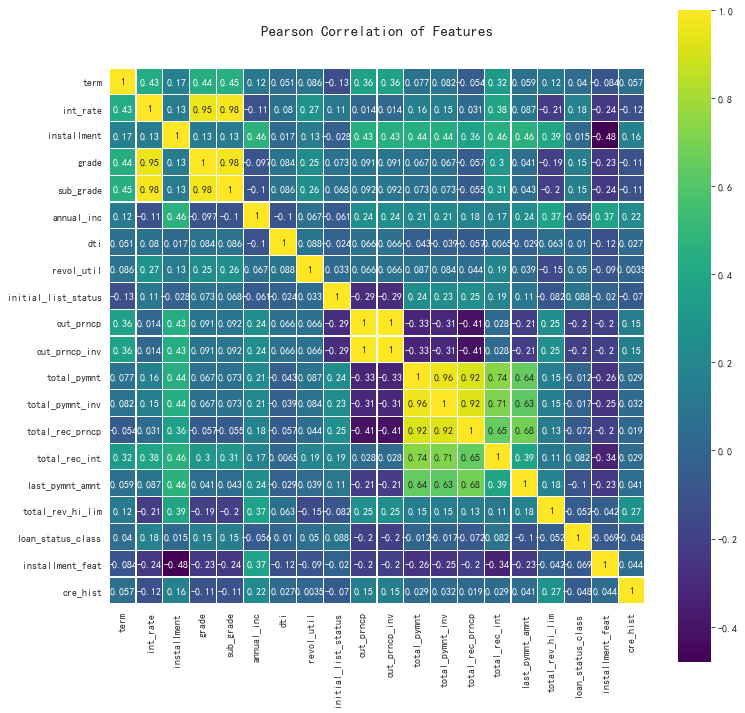

In [54]:
#用热力图看看相关性
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [55]:
#删除高相关性特征
df_drop=df[['int_rate','grade','out_prncp_inv','total_pymnt_inv','total_pymnt']]
df=df.drop(df_drop,axis=1)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

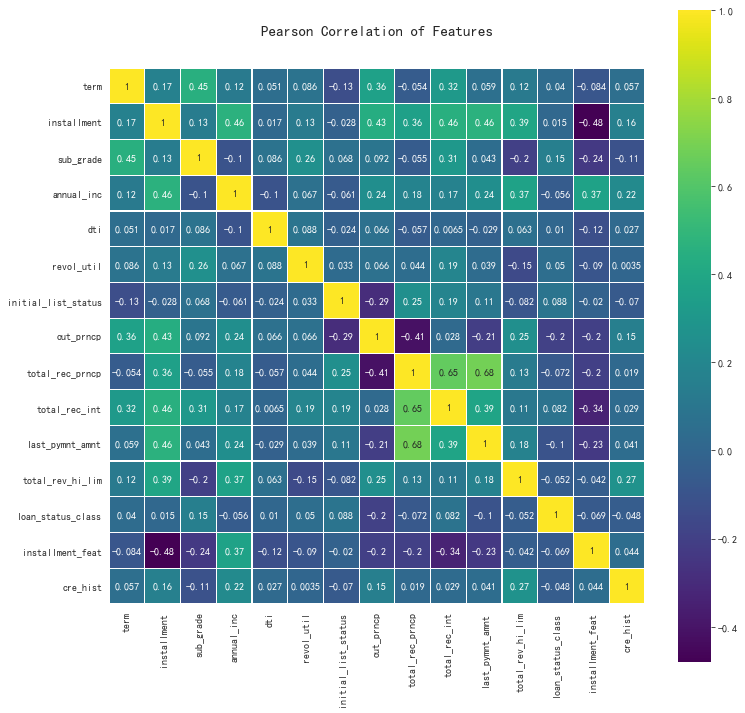

In [56]:
#用热力图看看相关性
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# 建模调参

## 训练测试分割

In [58]:
from sklearn.model_selection import train_test_split 
data_x, test_x, data_y, test_y = train_test_split(  
    df.drop(['loan_status_class'],axis=1),  
    df[['loan_status_class']].copy(),  
    test_size=0.25,  
    random_state=1991,  
    stratify=df[['loan_status_class']].copy()
) 

## 训练模型

In [59]:
#利用交叉验证和网格搜索
from sklearn.model_selection import GridSearchCV  #网格搜索
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.model_selection import train_test_split # 测试集与训练集划分

In [65]:
#构建网格参数组合
param_test1={"C":[0.01,0.1,1.0,10.0,20.0,30.0,100.0,200.0,300.0,1000.0], #正则化系数
            "penalty":["l1","l2"], #正则化参数
            "max_iter":[100,200,300,400,500]} #算法收敛的最大迭代次数
gsearch1=GridSearchCV(LogisticRegression(),param_grid=param_test1,cv=10)
gsearch1.fit(data_x,data_y)  #训练模型

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 20.0, 30.0, 100.0, 200.0,
                               300.0, 1000.0],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2']})

In [66]:
flt= LogisticRegression(penalty='l2',C=0.01)
flt.fit(data_x,data_y)

LogisticRegression(C=0.01)

In [70]:
#from sklearn.metrics import roc_auc_score
from sklearn import metrics
auc=roc_auc_score(flt.predict(test_x),test_y)
fpr,tpr,thre=metrics.roc_curve(flt.predict(test_x),test_y)
ks=max(tpr-fpr)
print("auc:{}       ks:{}".format(auc,ks))

auc:0.9313034231728587       ks:0.8626068463457175


## 解决过拟合问题

In [71]:
#删除疑似信息泄露特征
df_drop=data_x[['out_prncp']]
data_x=data_x.drop(df_drop,axis=1)
df_drop=test_x[['out_prncp']]
test_x=test_x.drop(df_drop,axis=1)

In [72]:
data_x.columns

Index(['term', 'installment', 'sub_grade', 'annual_inc', 'dti', 'revol_util',
       'initial_list_status', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'total_rev_hi_lim', 'installment_feat', 'cre_hist'],
      dtype='object')

In [73]:
flt= LogisticRegression(penalty='l2',C=0.01)
flt.fit(data_x,data_y)

LogisticRegression(C=0.01)

In [74]:
auc=roc_auc_score(flt.predict(test_x),test_y)
fpr,tpr,thre=metrics.roc_curve(flt.predict(test_x),test_y)
ks=max(tpr-fpr)
print("auc:{}       ks:{}".format(auc,ks))

auc:0.8082085517848777       ks:0.6164171035697554


# 输出评分卡

In [75]:
woe_dict = {}
#woe_list = []
for i in data_x.columns:
        woe_dict[i] = feature_woe_iv(x=df[i], y=df['loan_status_class'])
        #woe_list.append(feature_woe_iv(x=df[i], y=df['loan_status_class']))

In [77]:
#输出评分卡
#假设比率为1/20 时 分值是500，比率每翻倍一次的20分
B=20/np.log(2) 
A=500+B*np.log(1/20)
basescore=round(A-B*flt.coef_[0][0],0) #基准分四舍五入取整
scorecard={}
for i,j in enumerate(data_x.columns):
    woe=woe_dict[j]
    interval=[]
    scores=[]
    for key,value in woe.items():
        #score=round(-(value*flt.coef_[0][i+1]*B))
        score=round(-(value*flt.coef_[0][i]*B))
        scores.append(score)
        interval.append(key)
    data=(pd.DataFrame({"interval":interval,"scores":scores})).set_index("interval").to_dict()
    scorecard[j]=data

print(scorecard)

{'term': {'scores': {Interval(1.0, 1.5, closed='left'): 1.0, Interval(1.5, 2.1, closed='left'): -1.0}}, 'installment': {'scores': {Interval(0.0, 1.5, closed='left'): -0.0, Interval(1.5, 2.5, closed='left'): 0.0, Interval(2.5, 3.5, closed='left'): -0.0, Interval(3.5, 4.5, closed='left'): 0.0, Interval(4.5, 5.5, closed='left'): -0.0, Interval(5.5, 6.1, closed='left'): 0.0}}, 'sub_grade': {'scores': {Interval(1.0, 3.5, closed='left'): -1.0, Interval(3.5, 6.5, closed='left'): -1.0, Interval(6.5, 10.5, closed='left'): -0.0, Interval(10.5, 14.5, closed='left'): -0.0, Interval(14.5, 23.5, closed='left'): 0.0, Interval(23.5, 35.1, closed='left'): 1.0}}, 'annual_inc': {'scores': {Interval(0.0, 1.5, closed='left'): 0.0, Interval(1.5, 2.5, closed='left'): 0.0, Interval(2.5, 3.5, closed='left'): -0.0, Interval(3.5, 4.5, closed='left'): -0.0, Interval(4.5, 5.5, closed='left'): -0.0, Interval(5.5, 6.1, closed='left'): -0.0}}, 'dti': {'scores': {Interval(0.0, 12.185, closed='left'): 0.0, Interval(12.

{'term': {'scores': {Interval(1.0, 1.5, closed='left'): 1.0, Interval(1.5, 2.1, closed='left'): -1.0}}, 

'sub_grade': {'scores': {Interval(1.0, 3.5, closed='left'): -1.0, Interval(3.5, 6.5, closed='left'): -1.0, Interval(6.5, 10.5, closed='left'): -0.0, Interval(10.5, 14.5, closed='left'): -0.0, Interval(14.5, 23.5, closed='left'): 0.0, Interval(23.5, 35.1, closed='left'): 1.0}}, 

'initial_list_status': {'scores': {Interval(1.0, 1.5, closed='left'): -2.0, Interval(1.5, 2.1, closed='left'): 2.0}}, 

'total_rec_prncp': {'scores': {Interval(0.0, 1.5, closed='left'): 3.0, Interval(1.5, 2.5, closed='left'): -1.0, Interval(2.5, 3.5, closed='left'): -4.0, Interval(3.5, 4.5, closed='left'): 1.0, Interval(4.5, 5.5, closed='left'): 11.0, Interval(5.5, 6.1, closed='left'): 24.0}},

'total_rec_int': {'scores': {Interval(0.0, 1.5, closed='left'): -13.0, Interval(1.5, 2.5, closed='left'): -8.0, Interval(2.5, 3.5, closed='left'): -3.0, Interval(3.5, 4.5, closed='left'): 0.0, Interval(4.5, 5.5, closed='left'): 3.0, Interval(5.5, 6.1, closed='left'): 6.0}},

'last_pymnt_amnt': {'scores': {Interval(0.0, 1.5, closed='left'): -7.0, Interval(1.5, 2.5, closed='left'): -2.0, Interval(2.5, 3.5, closed='left'): -5.0, Interval(3.5, 4.5, closed='left'): -3.0, Interval(4.5, 5.5, closed='left'): 55.0, Interval(5.5, 6.1, closed='left'): 81.0}},

'total_rev_hi_lim': {'scores': {Interval(0.0, 1.5, closed='left'): -0.0, Interval(1.5, 2.5, closed='left'): -0.0, Interval(2.5, 3.5, closed='left'): -2.0, Interval(3.5, 4.5, closed='left'): 0.0, Interval(4.5, 5.5, closed='left'): 1.0, Interval(5.5, 6.1, closed='left'): 1.0}},

'installment_feat': {'scores': {Interval(0.0, 1.5, closed='left'): -3.0, Interval(1.5, 2.5, closed='left'): -2.0, Interval(2.5, 3.5, closed='left'): -0.0, Interval(3.5, 4.5, closed='left'): 1.0, Interval(4.5, 5.5, closed='left'): 2.0, Interval(5.5, 6.1, closed='left'): 2.0}},